<a href="https://colab.research.google.com/github/AndrewGavluk/PythonML/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import keras
from keras import backend as K
import keras.models as kModel
import keras.layers as kLayers
import keras.utils as utils
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

import keras.regularizers as regularizers

1.14.0
2.2.5


Using TensorFlow backend.


In [ ]:
# чистит сессию в Keras и TF
def reset_tf_session():
    curr_session = tf.get_default_session()
    # close current session
    if curr_session is not None:
        curr_session.close()
    # reset graph
    K.clear_session()
    # create new session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    s = tf.InteractiveSession(config=config)
    K.set_session(s)
    return s

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
print("Трейн:", x_train.shape, y_train.shape)
print("Тест:", x_test.shape, y_test.shape)

Трейн: (50000, 32, 32, 3) (50000, 1)
Тест: (10000, 32, 32, 3) (10000, 1)


In [ ]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


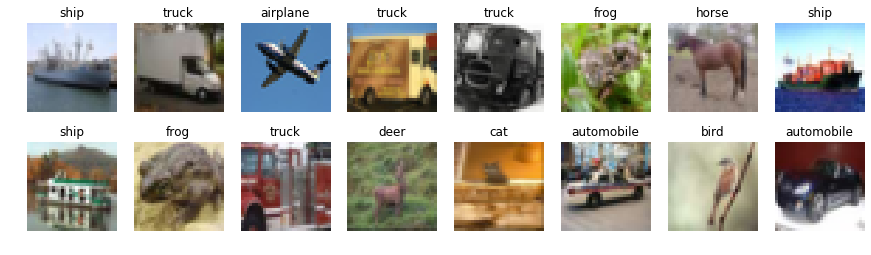

In [ ]:
# посмотрим на примеры картинок
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

In [ ]:
# нормализуем входы
x_train2 = x_train/255 - 0.5
x_test2 =  x_test/255 - 0.5

# конвертируем метки в np.array (?, NUM_CLASSES)
y_train2 = utils.to_categorical(y_train, NUM_CLASSES)
y_test2 =  utils.to_categorical(y_test, NUM_CLASSES)


In [ ]:
def make_model():
    model =  kModel.Sequential()
    
    model.add(kLayers.Conv2D(16, kernel_size=(3, 3), strides=(1, 1), padding="same",  input_shape=(32, 32, 3)))
    model.add(kLayers.Activation('elu'))

    model.add(kLayers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same"))
    model.add(kLayers.Activation('elu'))
    
    model.add(kLayers.MaxPool2D((2,2)))
    model.add(kLayers.Dropout(0.25))
    
      
    model.add(kLayers.Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding="same"))
    model.add(kLayers.Activation('elu'))
    
    model.add(kLayers.Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding="same"))
    model.add(kLayers.Activation('elu'))
    
    model.add(kLayers.MaxPool2D((2,2)))
    model.add(kLayers.Dropout(0.25))
    
    
    model.add(kLayers.Flatten())
    model.add(kLayers.Dense(256,  activation="elu" ))
    

    model.add(kLayers.Dropout(0.5))
    model.add(kLayers.Dense(NUM_CLASSES,  activation="softmax" ))
    return model

conv2d_1 (3 * 3 * 3) + 1) * 16 = 448

conv2d_2 (3 * 3 * 16 + 1) * 32 = 4640

conv2d_3 (3 * 3 * 32 + 1) * 32 = 9248

conv2d_4 (3 * 3 * 32 + 1) * 64 = 18496 

dense_1 (4096 + 1) * 256 =  1048832

dense_2 (256 + 1) * 10 = 2570

In [ ]:
s = reset_tf_session()
model = make_model()
model.summary()







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         

In [ ]:
#BATCH_SIZE = 200
BATCH_SIZE = 32
EPOCHS = 30
#EPOCHS = 75
#EPOCHS = 100

s = reset_tf_session()
model = make_model()

model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

model.fit(
    x_train2, y_train2,  # нормализованные данные
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_test2, y_test2),
    shuffle=True
)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 28s 555us/step - loss: 1.7685 - acc: 0.3642 - val_loss: 1.5173 - val_acc: 0.4569
Epoch 2/30
50000/50000 [==============================] - 22s 439us/step - loss: 1.4475 - acc: 0.4833 - val_loss: 1.4301 - val_acc: 0.4902
Epoch 3/30
50000/50000 [==============================] - 22s 432us/step - loss: 1.3001 - acc: 0.5398 - val_loss: 1.3094 - val_acc: 0.5235
Epoch 4/30
50000/50000 [==============================] - 22s 441us/step - loss: 1.2002 - acc: 0.5780 - val_loss: 1.0820 - val_acc: 0.6167
Epoch 5/30
50000/50000 [==============================] - 22s 441us/step - loss: 1.1151 - acc: 0.6103 - val_loss: 1.0597 - val_acc: 0.6221
Epoch 6/30
50000/50000 [==============================] - 22s 434us/step - loss: 1.0510 - acc: 0.6318 - val_loss: 1.0028 - val_acc: 0.6422
Epoch 7/30
50000/5000

In [ ]:
# тестовые предсказания
y_pred_test = model.predict_proba(x_test2)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

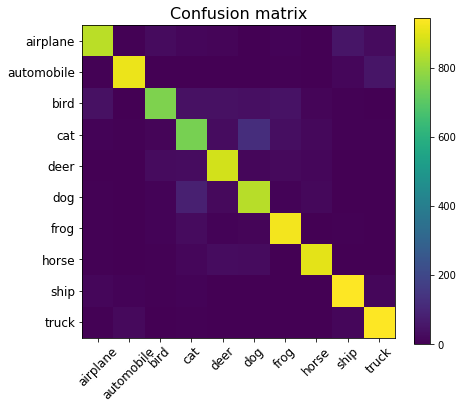

Test accuracy: 0.8706


In [ ]:
# confusion matrix и accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test, y_pred_test_classes))

In [ ]:
# посмотрим на предсказания
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()